ID: 190041220

Name: Tasfia Tasneem Annesha

Digital Image Processing

**Lab 6**


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.color
import skimage.filters
from scipy import signal
import random
import math
import numpy as np

In [2]:
def display_gray(image):
    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()

# Task 01
##Implement the following Low Pass Filters

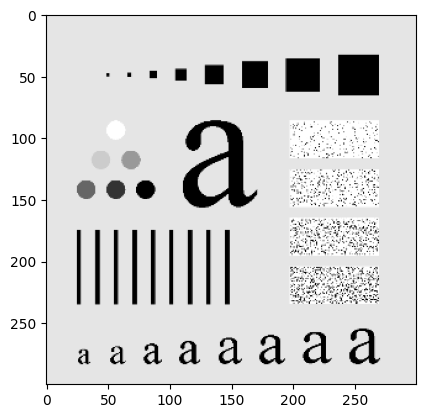

Image shape:  (300, 300)


In [4]:
image = cv2.imread('/content/Fig0441(a)(characters_test_pattern).tif') # BGR Image
image = cv2.resize(image, (300, 300))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_gray(image)
print("Image shape: ", image.shape)

i. Ideal Low Pass Filters

In [5]:
def getIdealLPFilter(h, w, d0):
    # h = image height
    # w = image width
    # d0 = cutoff frequency

    out = np.zeros((h, w, 2), dtype=float)
    x0, y0 = h//2, w//2
    #calculate the center coordinates of the filter

    for i in range(h):
        for j in range(w):
            d = math.sqrt((x0 - i)**2 + (y0 - j)**2)
            if d <= d0:
                out[i][j] = 1
    return out

ii. Butterworth LPF

In [6]:
def getButterworthLPFilter(h, w, d0, n):
    # h = image height # w = image width # d0 = cutoff frequency # n = order

    out = np.zeros((h, w, 2), dtype=float)
    x0, y0 = h//2, w//2

    for i in range(h):
        for j in range(w):
            d = math.sqrt((x0 - i)**2 + (y0 - j)**2)
            out[i][j] = 1/(1 + (d/d0)**(2*n))
    return out

iii. Gaussian LPF

In [7]:
def getGaussianLPFilter(h, w, d0):
    # h = image height
    # w = image width
    # d0 = cutoff frequency

    out = np.zeros((h, w, 2), dtype=float)
    x0, y0 = h//2, w//2

    for i in range(h):
        for j in range(w):
            d = math.sqrt((x0 - i)**2 + (y0 - j)**2)
            out[i][j] = math.exp((-d**2)/(2*(d0**2)))
    return out

In [8]:
def lowPassFiltering(image, d0, n=2, Ftype="ideal"):
    if Ftype == "ideal":
        F = getIdealLPFilter(image.shape[0], image.shape[1], d0)
    elif Ftype == "butterworth":
        F = getButterworthLPFilter(image.shape[0], image.shape[1], d0, n)
    elif Ftype == "gaussian":
        F = getGaussianLPFilter(image.shape[0], image.shape[1], d0)

    image_dft = cv2.dft(np.float32(image), flags = cv2.DFT_COMPLEX_OUTPUT)
    image_dft = np.fft.fftshift(image_dft)

    result = image_dft * F
    result = np.fft.ifftshift(result)

    image_idft = cv2.idft(result)
    image_idft = cv2.magnitude(image_idft[:, :, 0], image_idft[:, :, 1])

    return image_idft

**Result for Ideal Low pass filter:**

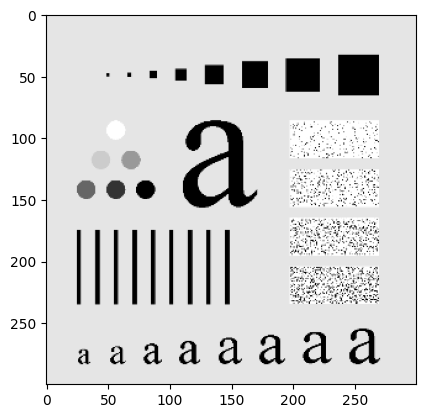

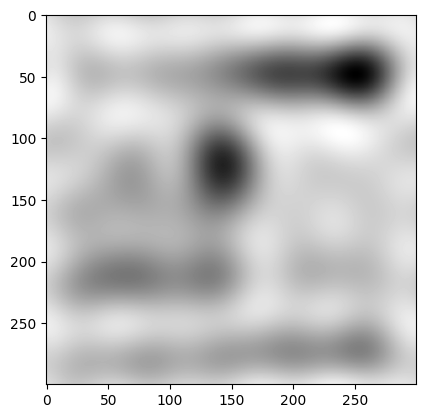

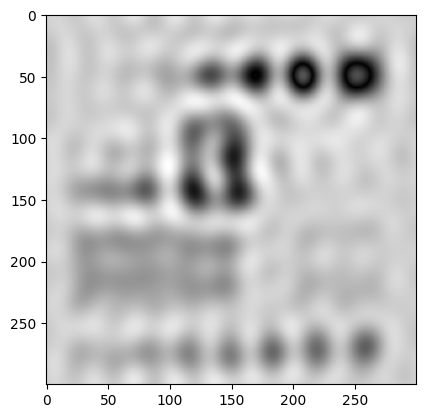

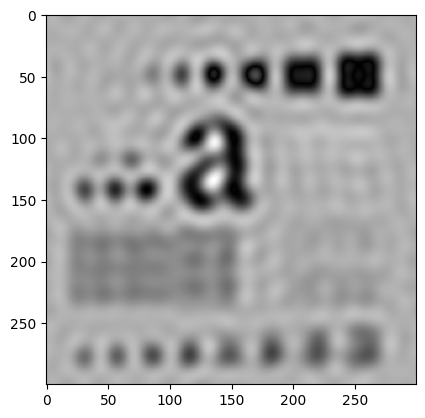

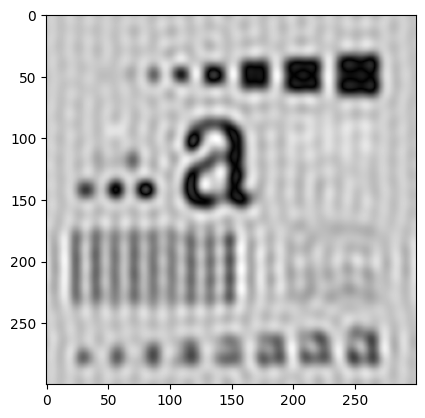

In [9]:
out5 = lowPassFiltering(image, 5)
out10 = lowPassFiltering(image, 10)
out15 = lowPassFiltering(image, 15)
out20 = lowPassFiltering(image, 20)

display_gray(image)
display_gray(out5)
display_gray(out10)
display_gray(out15)
display_gray(out20)

As the cutoff frequency decreases, the image becomes increasingly hazy. Since the ideal filter is equivalent to a sinc filter in the spatial domain, which causes the ringing effect, the blurry images exhibit the ringing effect.

**ForButterworth Low pass filter**

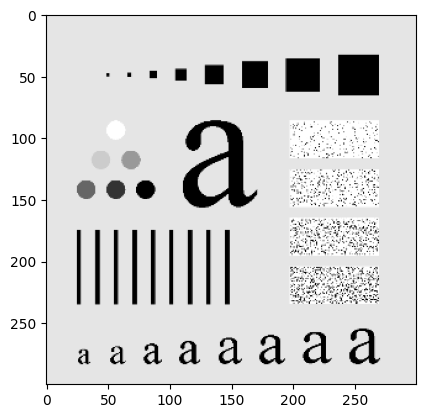

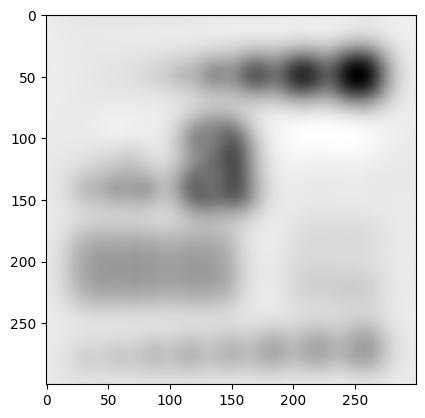

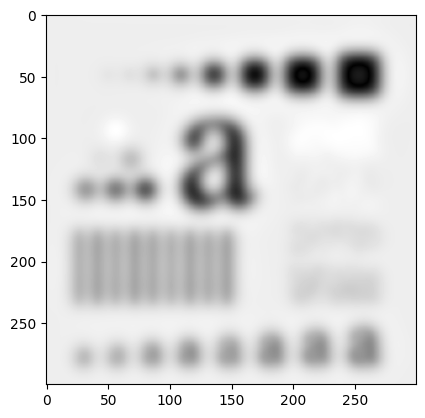

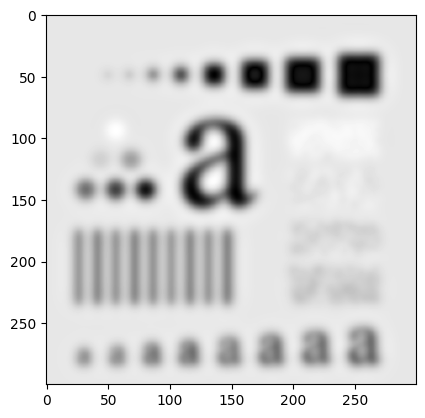

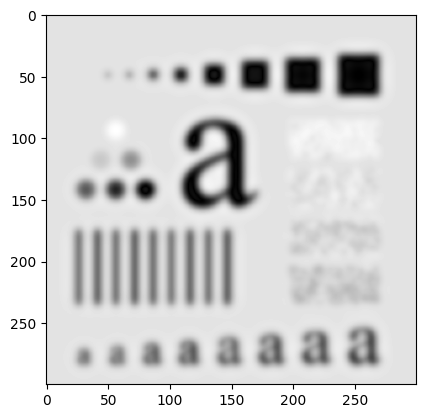

In [10]:
out5 = lowPassFiltering(image, 5, Ftype="butterworth")
out10 = lowPassFiltering(image, 10, Ftype="butterworth")
out15 = lowPassFiltering(image, 15, Ftype="butterworth")
out20 = lowPassFiltering(image, 20, Ftype="butterworth")

display_gray(image)
display_gray(out5)
display_gray(out10)
display_gray(out15)
display_gray(out20)

When we maintain the filter order at 2, we can see that the image becomes more blurry as the cutoff gets smaller, but the ringing effect is eliminated by the Butterworth filter's smooth transition.

**For Gaussian LPF**

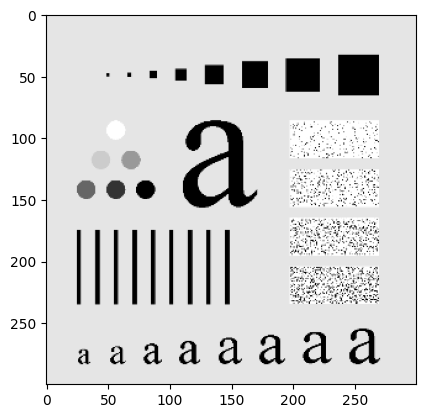

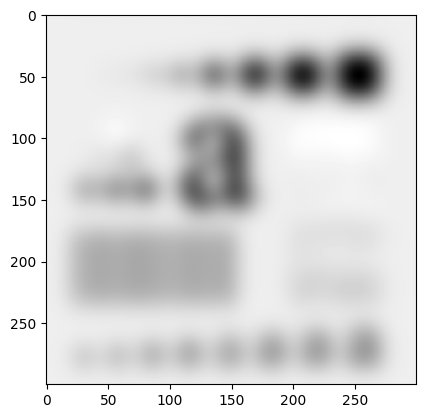

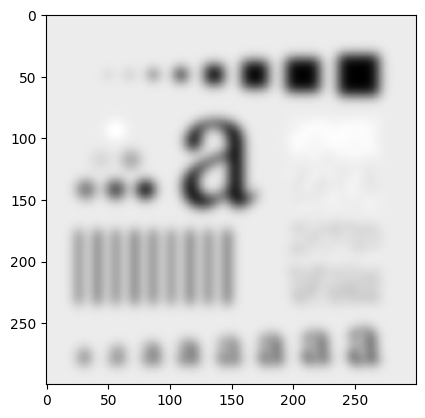

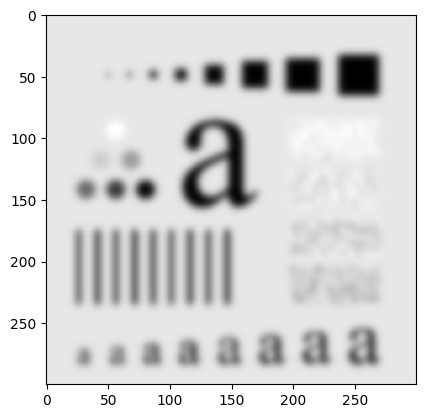

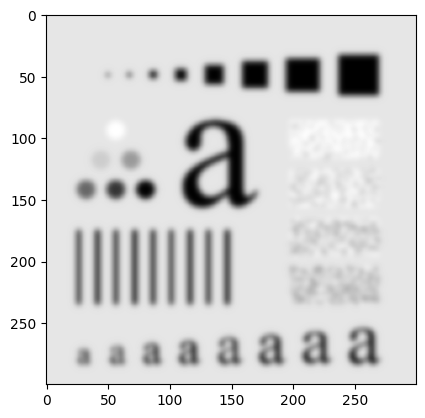

In [11]:
out5 = lowPassFiltering(image, 5, Ftype="gaussian")
out10 = lowPassFiltering(image, 10, Ftype="gaussian")
out15 = lowPassFiltering(image, 15, Ftype="gaussian")
out20 = lowPassFiltering(image, 20, Ftype="gaussian")

display_gray(image)
display_gray(out5)
display_gray(out10)
display_gray(out15)
display_gray(out20)

Depending on the cutoff, the Gaussian filter merely blurs the picture. This kind of filter never exhibits the ringing effect.

#Task 2

##Convert the Low Pass Filters above to High Pass Filters

i.Ideal HPF

In [15]:
def getIdealHPFilter(h, w, d0):
    # h = image height
    # w = image width
    # d0 = cutoff frequency

    out = np.ones((h, w, 2), dtype=float)
    x0, y0 = h//2, w//2

    for i in range(h):
        for j in range(w):
            d = math.sqrt((x0 - i)**2 + (y0 - j)**2)
            if d <= d0:
                out[i][j] = 0
    return out

ii.Butterworth

In [14]:
def getButterworthHPFilter(h, w, d0, n):
    # h = image height
    # w = image width
    # d0 = cutoff frequency
    # n = order

    out = np.zeros((h, w, 2), dtype=float)
    x0, y0 = h//2, w//2

    for i in range(h):
        for j in range(w):
            d = math.sqrt((x0 - i)**2 + (y0 - j)**2)
            out[i][j] = 1/(1 + (d0/(d + 1))**(2*n))
    return out

iii.Gaussian HPF

In [13]:
def getGaussianHPFilter(h, w, d0):
    # h = image height
    # w = image width
    # d0 = cutoff frequency

    out = np.zeros((h, w, 2), dtype=float)
    x0, y0 = h//2, w//2

    for i in range(h):
        for j in range(w):
            d = math.sqrt((x0 - i)**2 + (y0 - j)**2)
            out[i][j] = 1 - math.exp((-d**2)/(2*(d0**2)))
    return out

In [12]:
def highPassFiltering(image, d0, n=2, Ftype = "ideal"):
    if Ftype == "ideal":
        F = getIdealHPFilter(image.shape[0], image.shape[1], d0)
    elif Ftype == "butterworth":
        F = getButterworthHPFilter(image.shape[0], image.shape[1], d0, n)
    elif Ftype == "gaussian":
        F = getGaussianHPFilter(image.shape[0], image.shape[1], d0)

    image_dft = cv2.dft(np.float32(image), flags = cv2.DFT_COMPLEX_OUTPUT)
    image_dft = np.fft.fftshift(image_dft)

    result = image_dft * F
    result = np.fft.ifftshift(result)

    image_idft = cv2.idft(result)
    image_idft = cv2.magnitude(image_idft[:, :, 0], image_idft[:, :, 1])

    return image_idft

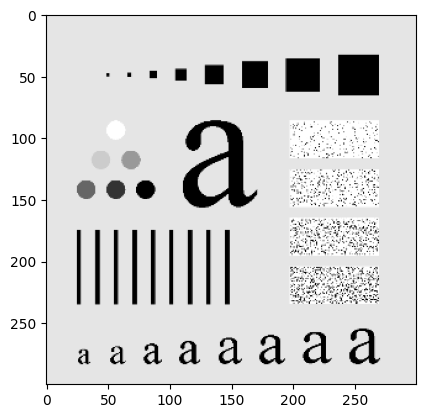

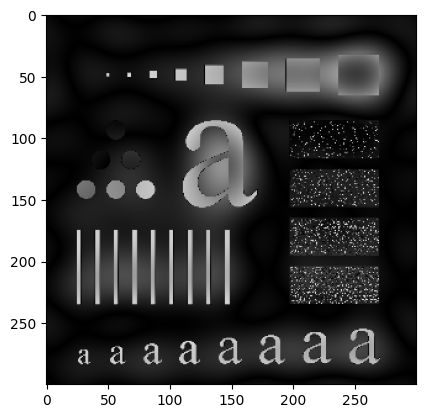

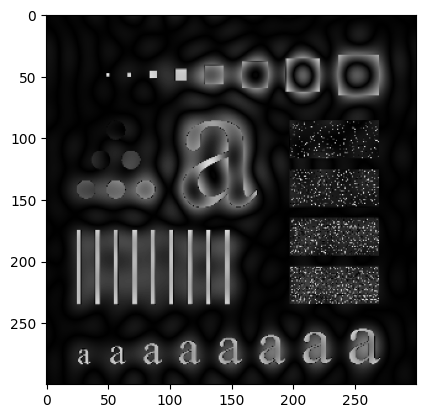

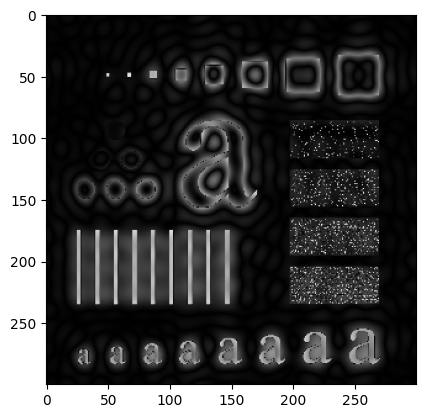

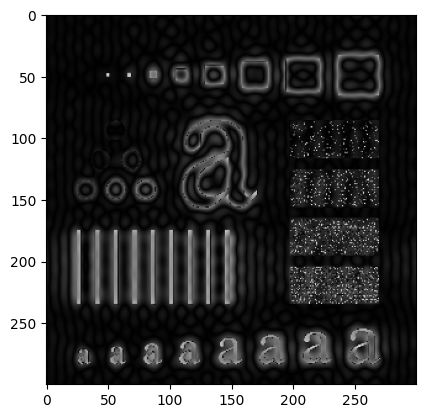

In [16]:
out5 = highPassFiltering(image, 5, Ftype="ideal")
out10 = highPassFiltering(image, 10, Ftype="ideal")
out15 = highPassFiltering(image, 15, Ftype="ideal")
out20 = highPassFiltering(image, 20, Ftype="ideal")

display_gray(image)
display_gray(out5)
display_gray(out10)
display_gray(out15)
display_gray(out20)

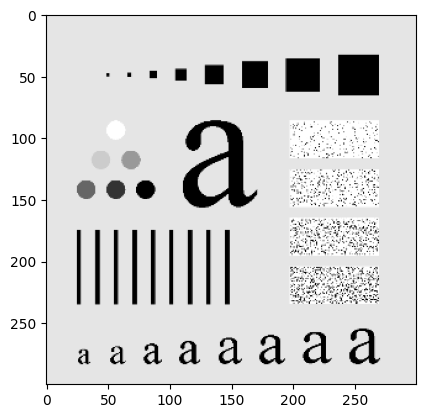

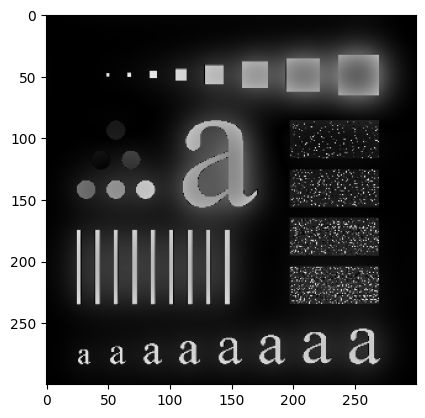

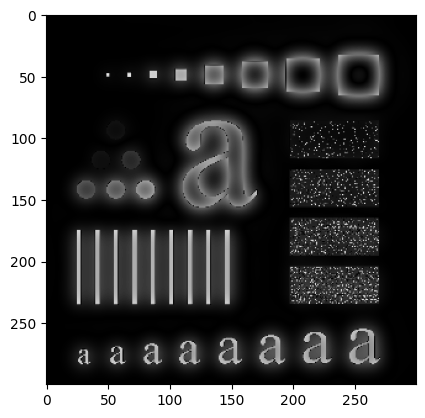

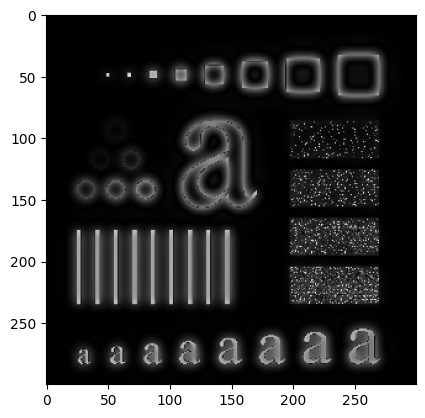

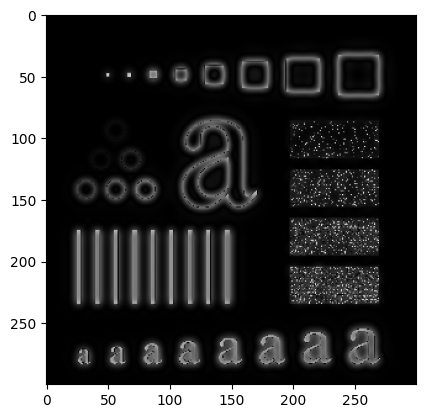

In [17]:
out5 = highPassFiltering(image, 5, Ftype="butterworth")
out10 = highPassFiltering(image, 10, Ftype="butterworth")
out15 = highPassFiltering(image, 15, Ftype="butterworth")
out20 = highPassFiltering(image, 20, Ftype="butterworth")

display_gray(image)
display_gray(out5)
display_gray(out10)
display_gray(out15)
display_gray(out20)

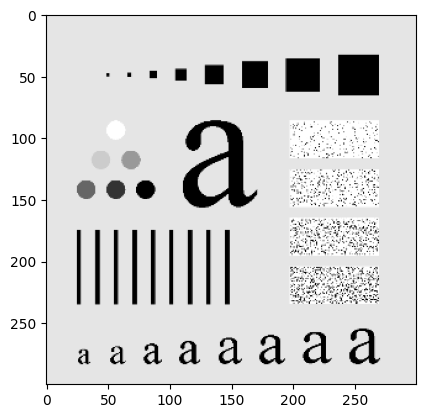

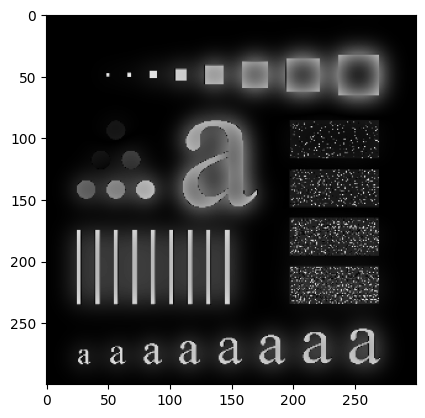

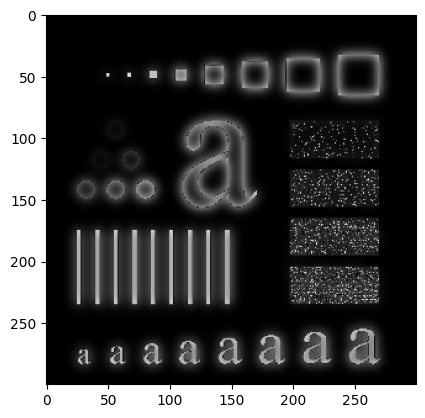

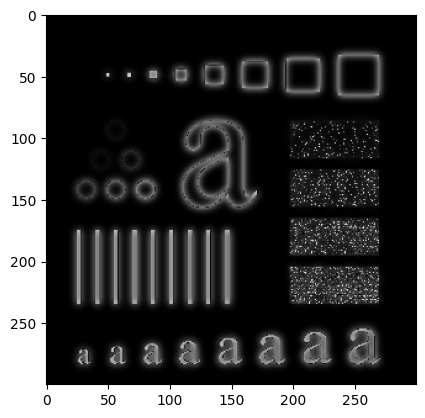

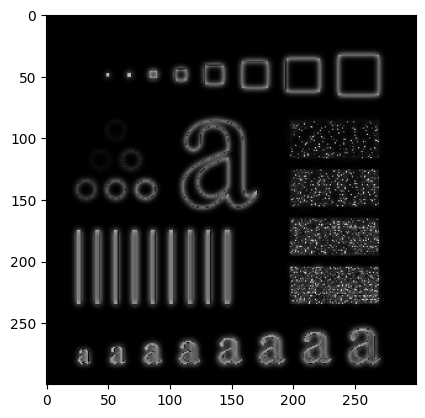

In [18]:
out5 = highPassFiltering(image, 5, Ftype="gaussian")
out10 = highPassFiltering(image, 10, Ftype="gaussian")
out15 = highPassFiltering(image, 15, Ftype="gaussian")
out20 = highPassFiltering(image, 20, Ftype="gaussian")

display_gray(image)
display_gray(out5)
display_gray(out10)
display_gray(out15)
display_gray(out20)

Depending on the cutoff, the Gaussian filter returns only the edge responses. When using a Gaussian filter, there will never be any ringing effects.